# Softmax 回歸分析

## Softmax 函數

一般而言，假設向量 $\pmb z = (z_1, z_2, \dots, z_k, \dots, z_C)$，並以 $f(\pmb z)$ 表示 $Softmax(\pmb z)$ 函數，則定義如下：

$$f_i = \frac{e^{z_i}}{\sum_{k=1}^C e^{z_k}}$$

其中，所有輸出成分的和為 1，即 $\sum_{i=1}^C f_i = 1$。這使得 Softmax 的輸出可以被視為一種機率分佈。梯度計算$\pmb f$ 對於 $\pmb z$ 的**梯度（Gradient）**

計算如下：當我們計算偏微分 $\frac{\partial f_i}{\partial z_j}$ 時，需要分兩種情況討論（使用微積分的商鎖定律）：當 $i = j$ 時：

$$\frac{\partial f_i}{\partial z_i} = f_i (1 - f_i)$$

當 $i \neq j$ 時：

$$\frac{\partial f_i}{\partial z_j} = -f_i f_j$$

因此，Softmax 的雅可比矩陣（Jacobian Matrix）可以統一表示為：

$$\frac{\partial f_i}{\partial z_j} = f_i (\delta_{ij} - f_j)$$

其中 $\delta_{ij}$ 為 Kronecker delta 函數（當 $i=j$ 時為 1，否則為 0）。

In [2]:
def softmax(x):
    # 將輸入轉換為 numpy 陣列
    x = np.array(x)
    # 計算 e 的 x 次方
    e_x = np.exp(x)
    # 回傳歸一化後的結果，使其總和為 1
    return e_x / e_x.sum()

# 測試一般數值
z = [3.0, 1.0, 0.2]
print("一般數值的 Softmax:", softmax(z))
print("證明所有值總和為 1:", softmax(z).sum())

# 測試較大數值
# 注意：np.exp(1000) 會產生數值溢位 (Overflow)，導致計算失敗
z = [100, 1000]
print("大數值的 Softmax (可能會溢位):", softmax(z))

一般數值的 Softmax: [0.8360188  0.11314284 0.05083836]
證明所有值總和為 1: 0.9999999999999999
大數值的 Softmax (可能會溢位): [ 0. nan]


/tmp/ipython-input-993195663.py:5: RuntimeWarning: overflow encountered in exp
  e_x = np.exp(x)
/tmp/ipython-input-993195663.py:7: RuntimeWarning: invalid value encountered in divide
  return e_x / e_x.sum()


In [3]:
def softmax(x):
    # 減去最大值 (x - np.max(x)) 是為了避免指數爆炸 (Numerical Stability)
    e_x = np.exp(x - np.max(x))
    # 將所有 e 的次方項除以總和，使輸出總和為 1
    return e_x / e_x.sum()

# 測試一般向量
z = [500, 1000]
print("穩定版向量 Softmax 結果：\n", softmax(z))

# 測試二維矩陣 (2 筆樣本, 3 個類別)
z = np.array([[1, 2, 3], [6, 2, 4]])
print("\n二維矩陣 Softmax (目前會將全體視為一組進行歸一化)：\n", softmax(z))
print("證明所有值總和為 1:", softmax(z).sum())

穩定版向量 Softmax 結果：
 [7.12457641e-218 1.00000000e+000]

二維矩陣 Softmax (目前會將全體視為一組進行歸一化)：
 [[0.00548473 0.01490905 0.04052699]
 [0.8140064  0.01490905 0.11016379]]
證明所有值總和為 1: 1.0


In [4]:
def softmax(x):
    # 找出最後一個軸（axis=-1）的最大值，通常代表各個類別的分數 (Logits)
    # keepdims=True 確保維度不會消失，以便後續進行廣播（Broadcasting）運算
    a = np.max(x, axis=-1, keepdims=True)

    # 減去最大值進行數值平移，防止 np.exp 發生數值溢位 (Overflow)
    e_x = np.exp(x - a)

    # 將每個指數值除以該列的總和，得到機率分佈
    # 分母同樣使用 keepdims=True 以確保除法運算對位正確
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# 執行 Softmax 運算
z = np.array([[1, 2, 3], [6, 2, 4]])
softmax_z = softmax(z)
print("執行 Softmax 運算:", softmax_z)

for i in range(softmax_z.shape[0]):
    print(f"\n第 {i+1} 筆樣本所有值總和為 1：", softmax_z[i].sum())
# print("證明所有值總和為 1:", softmax_z.sum())

執行 Softmax 運算: [[0.09003057 0.24472847 0.66524096]
 [0.86681333 0.01587624 0.11731043]]

第 1 筆樣本所有值總和為 1： 0.9999999999999999

第 2 筆樣本所有值總和為 1： 0.9999999999999999


這段程式碼透過視覺化的方式，生動地展示了 Softmax 函數 如何將連續的數值（Logits）轉換成機率分佈。這對於理解多分類模型中「模型信心度」的變化非常有幫助。

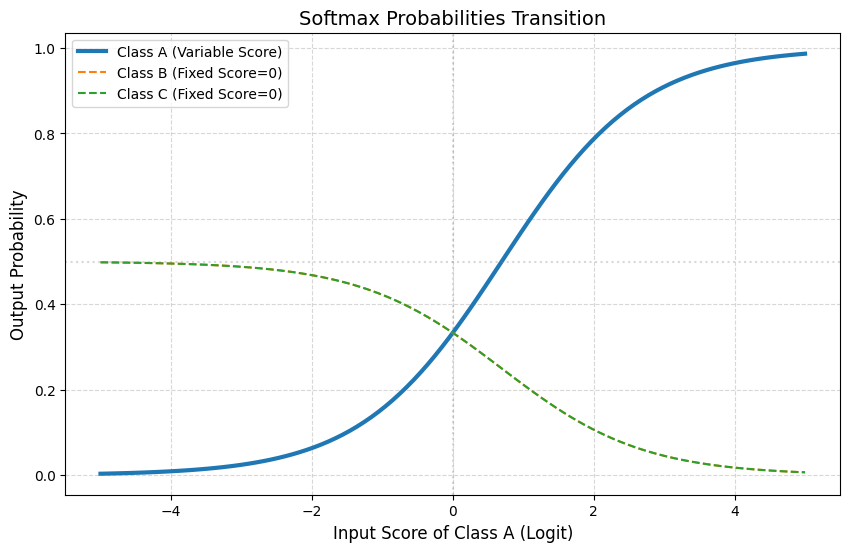

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    # 數值穩定版 Softmax：減去最大值避免指數溢位 (Overflow)
    # 這裡 axis=0 是因為輸入矩陣 logits 的維度設計為 (類別數, 樣本數)
    exp_z = np.exp(z - np.max(z, axis=0))
    return exp_z / np.sum(exp_z, axis=0)

# 建立 X 軸：類別 A 的分數 (Logit) 從 -5 變動到 5
x = np.linspace(-5, 5, 100)

# 假設共有三個類別：
# 讓類別 A 的得分隨 x 軸變動
# 固定類別 B 和類別 C 的得分為 0
logits = np.vstack([x, np.zeros_like(x), np.zeros_like(x)])

# 透過 Softmax 將得分轉換為機率
probs = softmax(logits)

# --- 繪圖 (Visualization) ---
plt.figure(figsize=(10, 6))

# 繪製各類別的機率曲線
plt.plot(x, probs[0], label='Class A (Variable Score)', linewidth=3, color='#1f77b4')
plt.plot(x, probs[1], label='Class B (Fixed Score=0)', linestyle='--', color='#ff7f0e')
plt.plot(x, probs[2], label='Class C (Fixed Score=0)', linestyle='--', color='#2ca02c')

# 標註圖表資訊
plt.title("Softmax Probabilities Transition", fontsize=14)
plt.xlabel("Input Score of Class A (Logit)", fontsize=12)
plt.ylabel("Output Probability", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()

# 繪製輔助線（y=0.5 門檻與 x=0 對齊線）
plt.axhline(y=0.5, color='gray', alpha=0.3, linestyle=':')
plt.axvline(x=0, color='gray', alpha=0.3, linestyle=':')

plt.show()

In [6]:
def softmax_gradient(z):
    f = softmax(z)                   # shape: (K,)
    J = np.diag(f) - np.outer(f, f)  # shape: (K, K)
    return J

x = [1, 2]
softmax_gradient(x)

def softmax_backward(z, df):
    return df@softmax_gradient(z)

df = [1, 3]
softmax_backward(x, df)

array([-0.39322387,  0.39322387])